<a href="https://colab.research.google.com/github/kaggler-KyotoUni/kaggle-titanic/blob/potedo_branch/titanic_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kaggle.json を google drive からダウンロードするコード
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build("drive", "v3")
results = drive_service.files().list(
    q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get("files", [])

filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]["id"])
fh = io.FileIO(filename, "wb")
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))

os.chmod(filename, 600)

Download 100%.


In [ ]:
!pip install kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
"""
kaggleのサイトからデータをダウンロード。
ここのコマンドは join しているコンペの Data タブの中に記載がある。
コンペごとに貼りかえる。
"""
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 10.7MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.9MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.27MB/s]


In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1687642b00>,
      dtype=object)

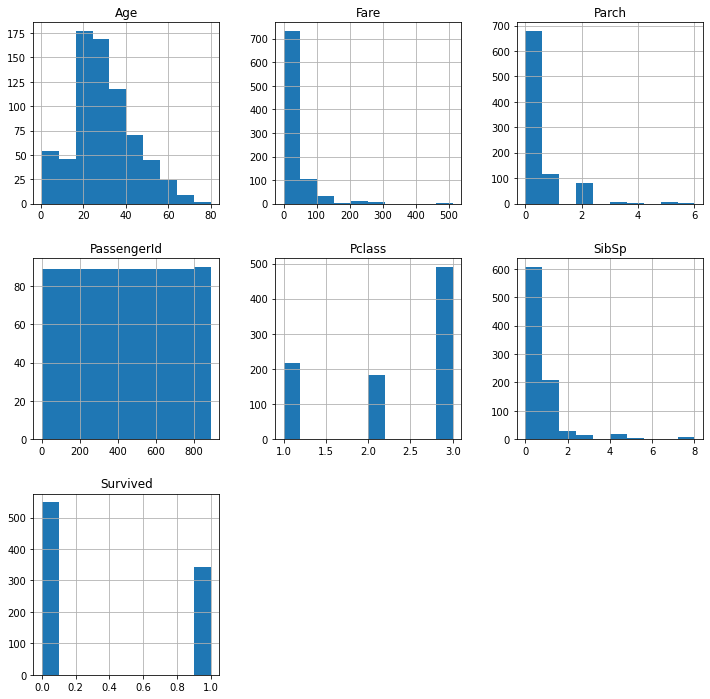

In [ ]:
train_df.hist(figsize=(12,12))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


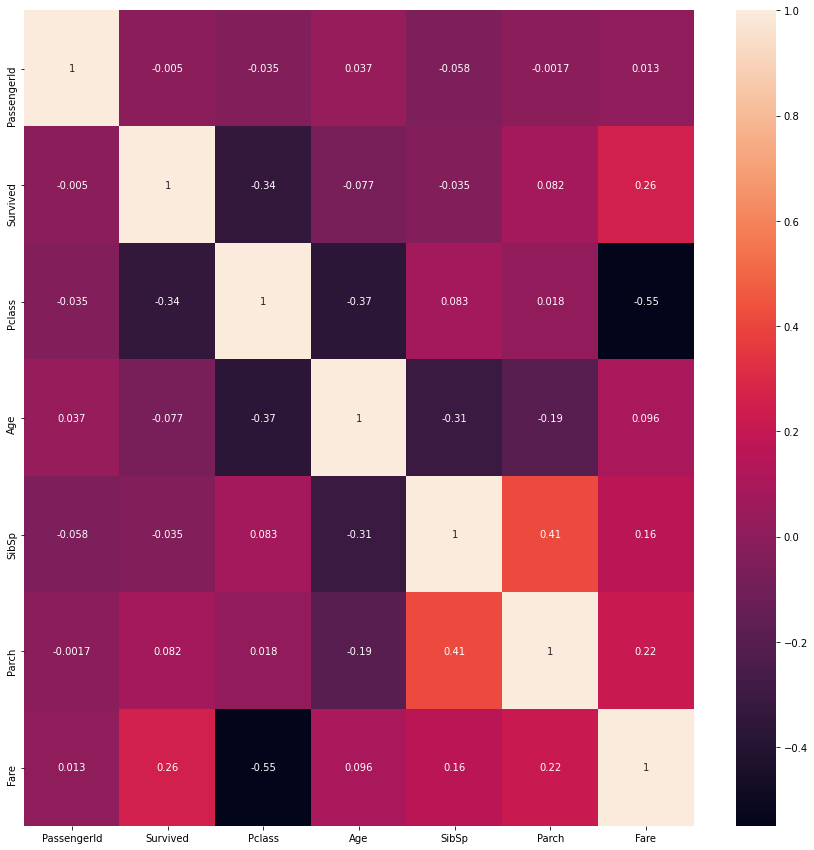

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(), annot=True)

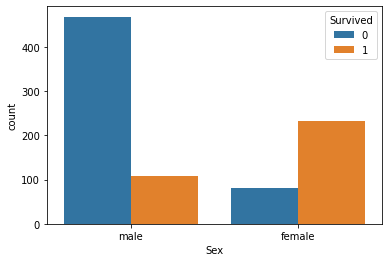

In [ ]:
sns.countplot("Sex", hue="Survived", data=train_df)

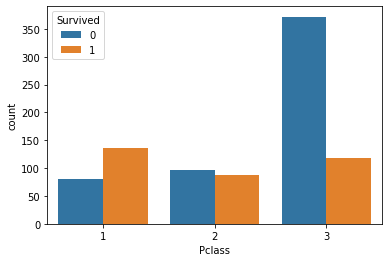

In [ ]:
sns.countplot("Pclass", hue="Survived", data=train_df)

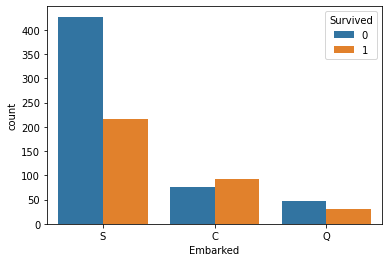

In [ ]:
sns.countplot("Embarked", hue="Survived", data=train_df)

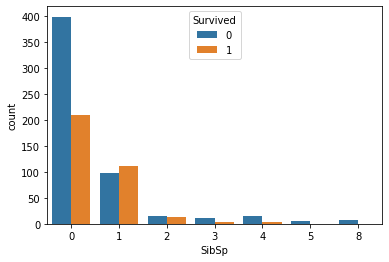

In [ ]:
sns.countplot("SibSp", hue="Survived", data=train_df)

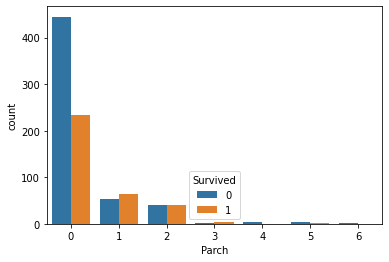

In [ ]:
sns.countplot("Parch", hue="Survived", data=train_df)

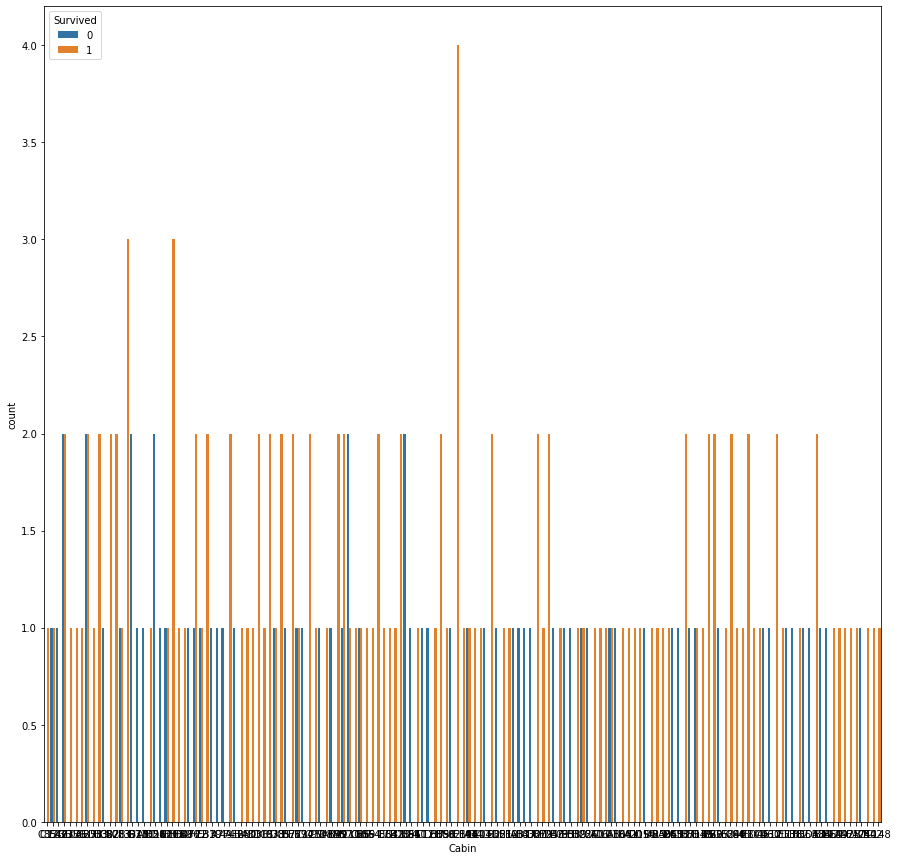

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot("Cabin", hue="Survived", data=train_df)

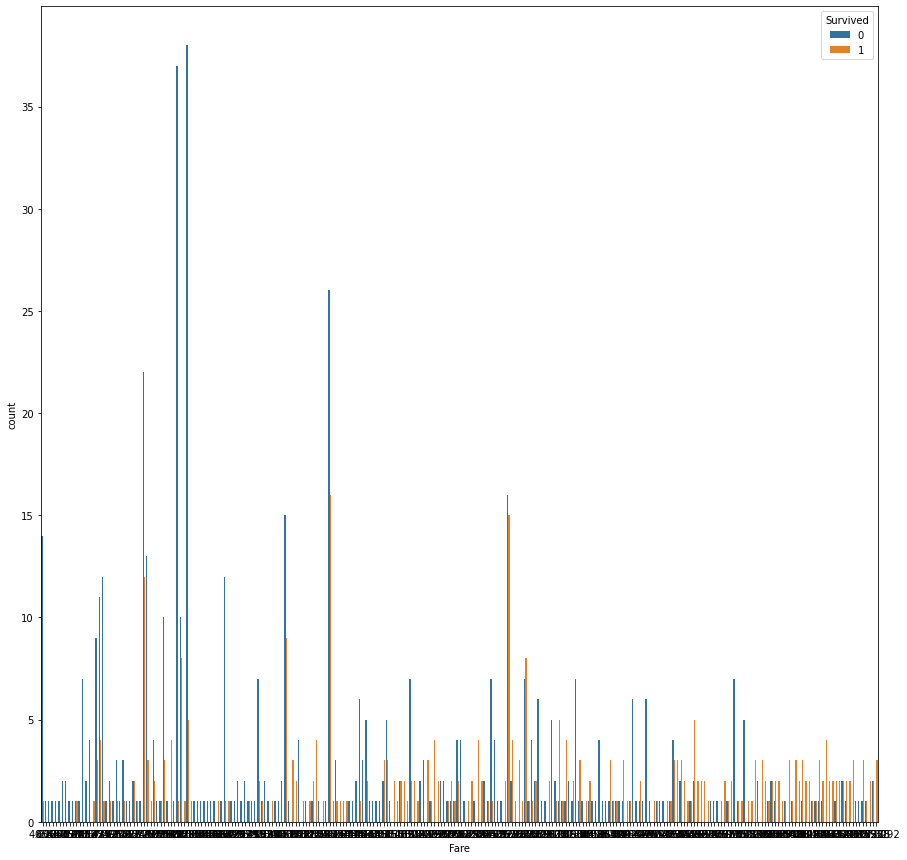

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot("Fare", hue="Survived", data=train_df)

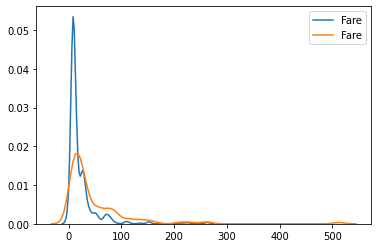

In [ ]:
sns.kdeplot(train_df["Fare"][train_df["Survived"]==0])
sns.kdeplot(train_df["Fare"][train_df["Survived"]==1])

In [ ]:
# 欠損値の処理
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [ ]:
# カテゴリ変数の変換
train_df["Sex"] = train_df["Sex"].map({"female": 0, "male": 1})
train_df["Embarked"] = train_df["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)

In [ ]:
train_df_main = train_df.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1)
train_df_id = train_df["PassengerId"]
train_df_label = train_df["Survived"]

# Qiita の記事を実際に実装してみる
https://qiita.com/shiroino11111/items/bc3889fa38ff32d46c13

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
dataset = pd.concat([train, test], ignore_index=True)
PassengerId = test["PassengerId"]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset_null = dataset.fillna(np.nan)
dataset_null.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
del dataset["Cabin"]

In [ ]:
dataset["Age"].fillna(dataset.Age.mean(), inplace=True)
dataset["Fare"].fillna(dataset.Fare.mean(), inplace=True)
dataset["Embarked"].fillna("S", inplace=True)

dataset_null = dataset.fillna(np.nan)
dataset_null.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
dataset1 = dataset[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

dataset_dummies = pd.get_dummies(dataset1)
dataset_dummies.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,7.2500,0,1,0,0,1
1,1.0,1,38.0,71.2833,1,0,1,0,0
2,1.0,3,26.0,7.9250,1,0,0,0,1
3,1.0,1,35.0,53.1000,1,0,0,0,1
4,0.0,3,35.0,8.0500,0,1,0,0,1


In [ ]:
train_set = dataset_dummies[dataset_dummies["Survived"].notnull()]
test_set = dataset_dummies[dataset_dummies["Survived"].isnull()]
del test_set["Survived"]

In [ ]:
X = train_set.values[:, 1:]
y = train_set.values[:, 0]

In [ ]:
clf = RandomForestClassifier(random_state=10, max_features="sqrt")
pipe = Pipeline([("classify", clf)])
param_test = {"classify__n_estimators": list(range(20, 30, 1)),
              "classify__max_depth": list(range(3, 10, 1))}
grid = GridSearchCV(estimator=pipe, param_grid=param_test, scoring="accuracy", cv=10)
grid.fit(X, y)

print(grid.best_params_, grid.best_score_, sep="\n")

{'classify__max_depth': 8, 'classify__n_estimators': 29}
0.8339200998751559


In [ ]:
# 提出テスト
pred = grid.predict(test_set)

submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": pred.astype(np.int32)})
submission.to_csv("submission1.csv", index=False)

# Parch と SibSp を加えて予測

In [ ]:
dataset2 = dataset[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "Parch", "SibSp"]]

dataset_dummies = pd.get_dummies(dataset2)
dataset_dummies.head()

,Survived,Pclass,Age,Fare,Parch,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,7.2500,0,1,0,1,0,0,1
1,1.0,1,38.0,71.2833,0,1,1,0,1,0,0
2,1.0,3,26.0,7.9250,0,0,1,0,0,0,1
3,1.0,1,35.0,53.1000,0,1,1,0,0,0,1
4,0.0,3,35.0,8.0500,0,0,0,1,0,0,1


In [ ]:
train_set = dataset_dummies[dataset_dummies["Survived"].notnull()]
test_set = dataset_dummies[dataset_dummies["Survived"].isnull()]
del test_set["Survived"]

X = train_set.values[:, 1:]
y = train_set.values[:, 0]

clf = RandomForestClassifier(random_state=10, max_features="sqrt")
pipe = Pipeline([("classify", clf)])
param_test = {"classify__n_estimators": list(range(20, 30, 1)),
              "classify__max_depth": list(range(3, 10, 1))}
grid = GridSearchCV(estimator=pipe, param_grid=param_test, scoring="accuracy", cv=10)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_, sep="\n")

{'classify__max_depth': 8, 'classify__n_estimators': 26}
0.8418227215980025


In [ ]:
pred = grid.predict(test_set)

submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": pred.astype(np.int32)})
submission.to_csv("submission2.csv", index=False)

# EDA的なことをやってみる

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

dataset = pd.concat([train, test], ignore_index=True)
PassengerId = test["PassengerId"]

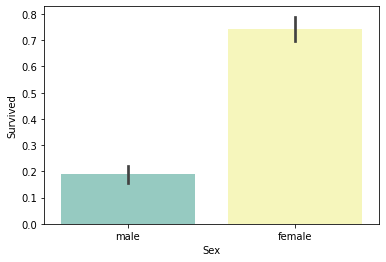

In [ ]:
# 年齢と生存の帯グラフ
sns.barplot(x="Sex", y="Survived", data=train, palette="Set3")

In [ ]:
# 性別ごとの生存率
print("females: %.2f" %(train["Survived"][train["Sex"]=="female"].value_counts(normalize=True)[1]))
print("males: %.2f" %(train["Survived"][train["Sex"]=="male"].value_counts(normalize=True)[1]))

females: 0.74
males: 0.19


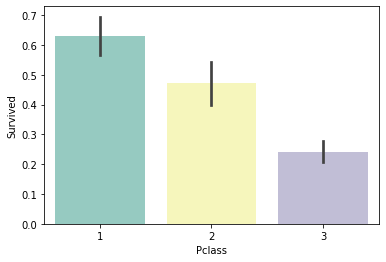

In [ ]:
# チケットクラスと生存の帯グラフ
sns.barplot(x="Pclass", y="Survived", data=train, palette="Set3")

In [ ]:
# チケットクラスごとの生存率
# ※ 値が小さいほど高級なチケット
print("Pclass = 1 : %.2f" %(train["Survived"][train["Pclass"]==1].value_counts(normalize=True)[1]))
print("Pclass = 2 : %.2f" %(train["Survived"][train["Pclass"]==2].value_counts(normalize=True)[1]))
print("Pclass = 3 : %.2f" %(train["Survived"][train["Pclass"]==3].value_counts(normalize=True)[1]))

Pclass = 1 : 0.63
Pclass = 2 : 0.47
Pclass = 3 : 0.24


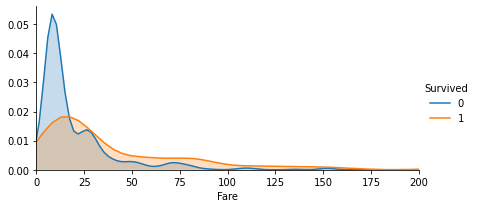

In [ ]:
# 料金による生存率比較
fare = sns.FacetGrid(train, hue="Survived", aspect=2)
fare.map(sns.kdeplot, "Fare", shade=True)
fare.set(xlim=(0, 200))
fare.add_legend()

### 上記からわかること → チケット料金が安い人は生存率が低い

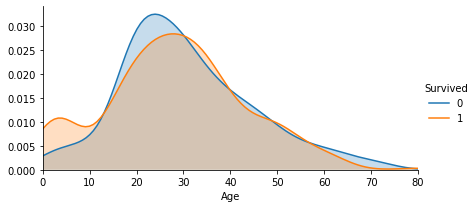

In [ ]:
# 年齢による生存率比較
age = sns.FacetGrid(train, hue="Survived", aspect=2)
age.map(sns.kdeplot, "Age", shade=True)
age.set(xlim=(0, train["Age"].max()))
age.add_legend()

### 上記からわかること → 10歳以下の子供の生存率が高い(優先的に助けられた？)

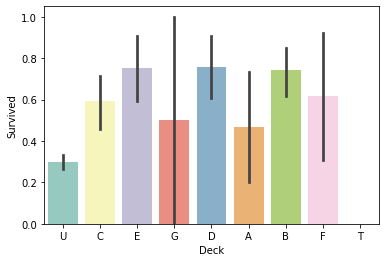

In [ ]:
# 客室階層による生存率比較
# 階層の図がないとこれには気づけない？
# Deck → 「客室階層」の情報
dataset["Cabin"] = dataset["Cabin"].fillna("Unknown")
dataset["Deck"] = dataset["Cabin"].str.get(0)
sns.barplot(x="Deck", y="Survived", data=dataset, palette="Set3")

In [ ]:
# Age と Fare がそれぞれの中央値、Embarked(出港地)はS(Southampton)を代入する
dataset["Age"].fillna(dataset.Age.median(), inplace=True)
dataset["Fare"].fillna(dataset.Fare.median(), inplace=True)
dataset["Embarked"].fillna("S", inplace=True)

dataset_null = dataset.fillna(np.nan)
dataset_null.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Deck             0
dtype: int64

In [ ]:
dataset3 = dataset[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "Deck"]]

dataset_dummies = pd.get_dummies(dataset3)
dataset_dummies.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,22.0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1.0,3,26.0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1.0,1,35.0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0.0,3,35.0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
train_set = dataset_dummies[dataset_dummies["Survived"].notnull()]
test_set = dataset_dummies[dataset_dummies["Survived"].isnull()]
del test_set["Survived"]

X = train_set.values[:, 1:]
y = train_set.values[:, 0]

clf = RandomForestClassifier(random_state=10, max_features="sqrt")
pipe = Pipeline([("classify", clf)])
param_test = {"classify__n_estimators": list(range(20, 30, 1)),
              "classify__max_depth": list(range(3, 10, 1))}
grid = GridSearchCV(estimator=pipe, param_grid=param_test, scoring="accuracy", cv=10)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'classify__max_depth': 7, 'classify__n_estimators': 20} 0.8316978776529339


In [ ]:
pred = grid.predict(test_set)

submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": pred.astype(np.int32)})
submission.to_csv("submission3.csv", index=False)

# チケットと生存率の関係を確認してみる

In [ ]:
Ticket_Count = dict(dataset["Ticket"].value_counts())
dataset["TicketGroup"] = dataset["Ticket"].apply(lambda x: Ticket_Count[x])

In [ ]:
dataset["TicketGroup"]

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: TicketGroup, Length: 1309, dtype: int64

In [ ]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

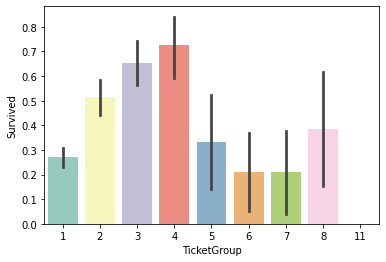

In [ ]:
sns.barplot(x="TicketGroup", y="Survived", data=dataset, palette="Set3")

In [ ]:
dataset4 = dataset[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "Deck", "TicketGroup"]]

dataset_dummies = pd.get_dummies(dataset4)
dataset_dummies.head()

,Survived,Pclass,Age,Fare,TicketGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,22.0,7.2500,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,71.2833,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1.0,3,26.0,7.9250,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1.0,1,35.0,53.1000,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0.0,3,35.0,8.0500,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
train_set = dataset_dummies[dataset_dummies["Survived"].notnull()]
test_set = dataset_dummies[dataset_dummies["Survived"].isnull()]
del test_set["Survived"]

X = train_set.values[:, 1:]
y = train_set.values[:, 0]

clf = RandomForestClassifier(random_state=10, max_features="sqrt")
pipe = Pipeline([("classify", clf)])
param_test = {"classify__n_estimators": list(range(20, 30, 1)),
              "classify__max_depth": list(range(3, 10, 1))}
grid = GridSearchCV(estimator=pipe, param_grid=param_test, scoring="accuracy", cv=10)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_, sep="\n")

{'classify__max_depth': 6, 'classify__n_estimators': 21}
0.8373033707865168


In [ ]:
pred = grid.predict(test_set)

submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": pred.astype(np.int32)})
submission.to_csv("submission4.csv", index=False)

# これだと微妙なので、さらにグループ分けして予測を行う

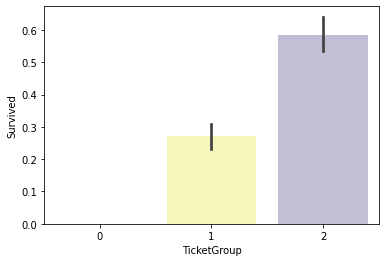

In [ ]:
"""
文字数でグループ分けしたと記事では書かれているが、実際のところは何枚同じ番号のチケットがあるかという区分である
→ つまり、複数枚同じ名称のチケットがあったとき、その同じ名称のチケットの枚数によって生存率が高いグループとそうでないグループに分けた、
　　というのが正確な解釈になる。
"""

def Ticket_Labels(s):
    if (s >= 2) & (s <= 4): # 文字数での生存率が高いグループ
        return 2
    elif ((s > 4) & (s <= 8)) | (s==1): # 文字数での生存率が低いグループ
        return 1
    elif (s > 8):
        return 0

dataset["TicketGroup"] = dataset["TicketGroup"].apply(Ticket_Labels)
sns.barplot(x="TicketGroup", y="Survived", data=dataset, palette="Set3")

In [ ]:
train_set = dataset_dummies[dataset_dummies["Survived"].notnull()]
test_set = dataset_dummies[dataset_dummies["Survived"].isnull()]
del test_set["Survived"]

X = train_set.values[:, 1:]
y = train_set.values[:, 0]

clf = RandomForestClassifier(random_state=10, max_features="sqrt")
pipe = Pipeline([("classify", clf)])
param_test = {"classify__n_estimators": list(range(20, 30, 1)),
              "classify__max_depth": list(range(3, 10, 1))}
grid = GridSearchCV(estimator=pipe, param_grid=param_test, scoring="accuracy", cv=10)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_, sep="\n")

{'classify__max_depth': 6, 'classify__n_estimators': 21}
0.8373033707865168


In [ ]:
pred = grid.predict(test_set)

submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": pred.astype(np.int32)})
submission.to_csv("submission5.csv", index=False)

# 精度上昇のために色々やるやつ

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings("ignore")

In [37]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

dataset = pd.concat([train, test], ignore_index=True)

PassengerId = test["PassengerId"]

In [38]:
dataset["Cabin"] = dataset["Cabin"].fillna("Unknown")
dataset["Deck"] = dataset["Cabin"].str.get(0)

Ticket_Count = dict(dataset["Ticket"].value_counts())
dataset["TicketGroup"] = dataset["Ticket"].apply(lambda x: Ticket_Count[x])

def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

dataset["TicketGroup"] = dataset["TicketGroup"].apply(Ticket_Label)

# 敬称で特徴を作る

'敬称一覧\nMr：男 , Master：男の子, Jonkheer：オランダ貴族(男),\nMlle：マドモワゼル (フランス未婚女性), Miss：未婚女性、女の子, Mme：マダム(フランス既婚女性), Ms：女性(未婚・既婚問わず), Mrs：既婚女性, \nDon：男(スペイン), Sir：男(イギリス), the Countess：伯爵夫人, Dona：既婚女性(スペイン), Lady：既婚女性(イギリス),\nCapt：船長, Col：大佐, Major：軍人, Dr：医者, Rev：聖職者や牧師\n'

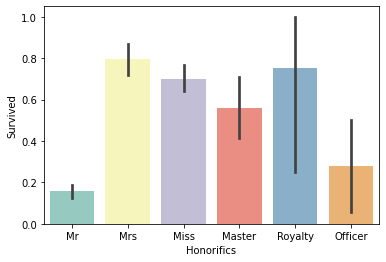

In [39]:
# Honorifics(敬称)による特徴別に分ける
dataset["Honorifics"] = dataset["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

Honorifics_Dict = {}
Honorifics_Dict.update(dict.fromkeys(["Capt", "Col", "Major", "Dr", "Rev"], "Officer"))
Honorifics_Dict.update(dict.fromkeys(["Don", "Sir", "the Countess", "Dona", "Lady"], "Royalty"))
Honorifics_Dict.update(dict.fromkeys(["Mme", "Ms", "Mrs"], "Mrs"))
Honorifics_Dict.update(dict.fromkeys(["Mlle", "Miss"], "Miss"))
Honorifics_Dict.update(dict.fromkeys(["Mr"], "Mr"))
Honorifics_Dict.update(dict.fromkeys(["Master", "Jonkheer"], "Master"))

dataset["Honorifics"] = dataset["Honorifics"].map(Honorifics_Dict)
sns.barplot(x="Honorifics", y="Survived", data=dataset, palette="Set3")

"""敬称一覧
Mr：男 , Master：男の子, Jonkheer：オランダ貴族(男),
Mlle：マドモワゼル (フランス未婚女性), Miss：未婚女性、女の子, Mme：マダム(フランス既婚女性), Ms：女性(未婚・既婚問わず), Mrs：既婚女性, 
Don：男(スペイン), Sir：男(イギリス), the Countess：伯爵夫人, Dona：既婚女性(スペイン), Lady：既婚女性(イギリス),
Capt：船長, Col：大佐, Major：軍人, Dr：医者, Rev：聖職者や牧師
"""

# 欠損値の代入を見直し ─ 学習モデルを利用して穴埋め

In [40]:
## 年齢の欠損値を予測して代入
# 年齢予測のために使う項目を抽出し、ダミー変数を作成

age = dataset[["Age", "Pclass", "Sex", "Honorifics"]]
age_dummies = pd.get_dummies(age)
age_dummies.head()


,Age,Pclass,Sex_female,Sex_male,Honorifics_Master,Honorifics_Miss,Honorifics_Mr,Honorifics_Mrs,Honorifics_Officer,Honorifics_Royalty
0,22.0,3,0,1,0,0,1,0,0,0
1,38.0,1,1,0,0,0,0,1,0,0
2,26.0,3,1,0,0,1,0,0,0,0
3,35.0,1,1,0,0,0,0,1,0,0
4,35.0,3,0,1,0,0,1,0,0,0


In [41]:
# age が分かるものと欠損しているものに分ける
known_age = age_dummies[age_dummies.Age.notnull()].values
null_age = age_dummies[age_dummies.Age.isnull()].values

age_X = known_age[:,1:]
age_y = known_age[:,0]

rf = RandomForestRegressor()
rf.fit(age_X, age_y)
pred_Age = rf.predict(null_age[:,1:])
dataset.loc[(dataset.Age.isnull()), "Age"] = pred_Age

In [42]:
dataset[dataset["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,TicketGroup,Honorifics
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,2,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,2,Mrs


# Embarked の欠損値 → どちらも Pclassが1で、Fareが80.0である
### チケットクラス1のもののうち、EmbarkedごとのFareの中央値を確認し、最も近いもので埋めることにする

In [43]:
C = dataset[(dataset["Embarked"]=="C") & (dataset["Pclass"]==1)]["Fare"].median()
S = dataset[(dataset["Embarked"]=="S") & (dataset["Pclass"]==1)]["Fare"].median()
Q = dataset[(dataset["Embarked"]=="Q") & (dataset["Pclass"]==1)]["Fare"].median()

print("C median: ", C)
print("S median: ", S)
print("Q median: ", Q)

C median:  76.7292
S median:  52.0
Q median:  90.0


In [44]:
dataset["Embarked"] = dataset["Embarked"].fillna("C")

In [45]:
dataset[dataset["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,TicketGroup,Honorifics
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,U,1,Mr


# Fareの欠損値 → Pclassが3で、"Embarked"が"S"とわかる

In [46]:
fare_median = dataset[(dataset["Embarked"]=="S") & (dataset["Pclass"]==3)].Fare.median()
dataset["Fare"] = dataset["Fare"].fillna(fare_median)

dataset_null = dataset.fillna(np.nan)
dataset_null.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Deck             0
TicketGroup      0
Honorifics       0
dtype: int64

# 家族の人数をうまく使う

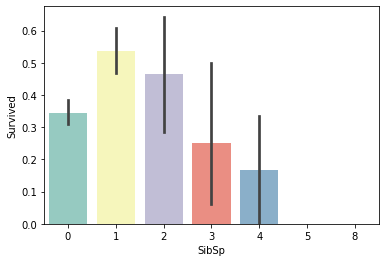

In [47]:
# 同乗している兄弟/配偶者の数による生存率比較
sns.barplot(x="SibSp", y="Survived", data=train, palette="Set3")

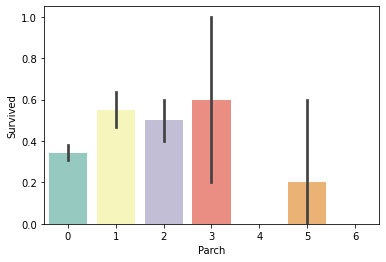

In [48]:
# 同乗している親/子供の数による生存率比較
sns.barplot(x="Parch", y="Survived", data=train, palette="Set3")

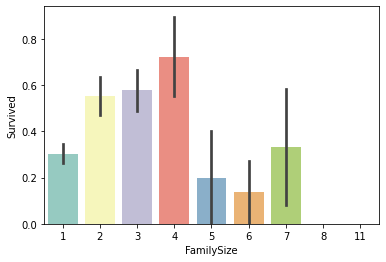

In [49]:
# 同乗している家族の数
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
sns.barplot(x="FamilySize", y="Survived", data=dataset, palette="Set3")

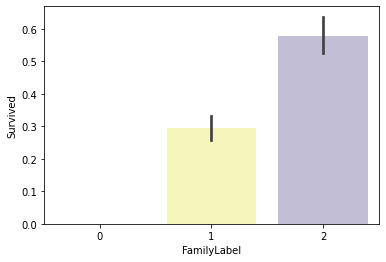

In [50]:
# 家族数による生存率でグループ分け
def Family_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0

dataset["FamilyLabel"] = dataset["FamilySize"].apply(Family_label)
sns.barplot(x="FamilyLabel", y="Survived", data=dataset, palette="Set3")

# 苗字における生存率比較
### 上記の特徴量では、3等親以降の家族関係が不明 → 苗字における生存率で調査

In [51]:
# 苗字による特徴量調査
dataset["Surname"] = dataset["Name"].apply(lambda x: x.split(",")[0].strip())
Surname_Count = dict(dataset["Surname"].value_counts())
dataset["Surname_Count"] = dataset["Surname"].apply(lambda x: Surname_Count[x])

In [52]:
# 苗字にダブりがある人を、女・子供のグループと、大人で男性のグループに分ける
Female_Child_Group = dataset.loc[(dataset["Surname_Count"]>=2) & ((dataset["Age"]<=12) | (dataset["Sex"]=="female"))]
Male_Adult_Group = dataset.loc[(dataset["Surname_Count"]>=2) & (dataset["Age"]>12) & (dataset["Sex"]=="male")]

In [53]:
# 女・子供グループにおける苗字ごとの生存率平均の個数を比較
Female_Child_mean = Female_Child_Group.groupby("Surname")["Survived"].mean()
Female_Child_mean_count = pd.DataFrame(Female_Child_mean.value_counts())
Female_Child_mean_count.columns=["GroupCount"]
Female_Child_mean_count

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


In [54]:
# 男(大人)グループにおける苗字ごとの生存率平均の個数を比較
Male_Adult_mean = Male_Adult_Group.groupby("Surname")["Survived"].mean()
Male_Adult_mean_count = pd.DataFrame(Male_Adult_mean.value_counts())
Male_Adult_mean_count.columns=["GroupCount"]
Male_Adult_mean_count

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


In [55]:
# 各グループの例外を処理
# 各グループの例外となる苗字を抽出
# Dead_List: 女・子供グループで全員死亡した苗字
# Survived_List: 男(大人)グループで全員生存した苗字
Dead_List = set(Female_Child_mean[Female_Child_mean.apply(lambda x: x==0)].index)
print("Dead_List", Dead_List, sep="\n")
Survived_List = set(Male_Adult_mean[Male_Adult_mean.apply(lambda x: x==1)].index)
print("Survived_List", Survived_List, sep="\n")

Dead_List
{'Turpin', 'Zabour', 'Bourke', 'Arnold-Franchi', 'Sage', 'Barbara', 'Cacic', 'Oreskovic', 'Johnston', 'Strom', 'Rosblom', 'Attalah', 'Jussila', 'Rice', 'Canavan', 'Ford', 'Skoog', 'Panula', 'Danbom', 'Lobb', 'Caram', 'Vander Planke', 'Van Impe', 'Robins', 'Palsson', 'Lefebre', 'Lahtinen', 'Boulos', 'Goodwin', 'Ilmakangas', 'Olsson'}
Survived_List
{'Chambers', 'Bishop', 'Beckwith', 'Frolicher-Stehli', 'Goldenberg', 'Harder', 'Jonsson', 'Beane', 'Jussila', 'Dick', 'Bradley', 'Frauenthal', 'McCoy', 'Greenfield', 'Kimball', 'Taylor', 'Duff Gordon', 'Cardeza', 'Daly', 'Nakid'}


In [56]:
# テストデータを書き換える
# データをtrainとtestに分解
train = dataset.loc[dataset["Survived"].notnull()]
test = dataset.loc[dataset["Survived"].isnull()]

# 女・子供グループで全員死亡した苗字の人 → 60歳の男性、敬称は"Mr"に
# 男(大人)グループで全員生存した苗字の人 → 5歳の女性、敬称は"Miss"に
test.loc[(test["Surname"].apply(lambda x:x in Dead_List)), "Sex"] = "male"
test.loc[(test["Surname"].apply(lambda x:x in Dead_List)), "Age"] = 60
test.loc[(test["Surname"].apply(lambda x:x in Dead_List)), "Title"] = "Mr"

test.loc[(test["Surname"].apply(lambda x:x in Survived_List), "Sex")] = "female"
test.loc[(test["Surname"].apply(lambda x:x in Survived_List), "Age")] = 5
test.loc[(test["Surname"].apply(lambda x:x in Survived_List), "Title")] = "Miss"

dataset = pd.concat([train, test])

# 再度予測を行う

In [57]:
dataset6 = dataset[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "Honorifics", "FamilyLabel", "Deck", "TicketGroup"]]

dataset_dummies = pd.get_dummies(dataset6)
dataset_dummies.head()

,Survived,Pclass,Age,Fare,FamilyLabel,TicketGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Honorifics_Master,Honorifics_Miss,Honorifics_Mr,Honorifics_Mrs,Honorifics_Officer,Honorifics_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,22.0,7.2500,2,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,71.2833,2,2,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1.0,3,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,1,35.0,53.1000,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0.0,3,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
# データをtrainとtestに分解 
#（ 'Survived'が存在するのがtrain, しないのがtest ）
train_set = dataset_dummies[dataset_dummies['Survived'].notnull()]
test_set = dataset_dummies[dataset_dummies['Survived'].isnull()]
del test_set["Survived"]

# trainデータを変数と正解に分離
X = train_set.values[:, 1:] # Pclass以降の変数
y = train_set.values[:, 0] # 正解データ

# 予測モデルの作成
pipe = Pipeline([('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20, 30, 1)), 
              'classify__max_depth':list(range(3, 10, 1))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='accuracy', cv=10)
gsearch.fit(X, y)
print(gsearch.best_params_, gsearch.best_score_)

# testデータの予測
predictions = gsearch.predict(test_set)

# Kaggle提出用csvファイルの作成
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission6.csv", index=False)

{'classify__max_depth': 9, 'classify__n_estimators': 27} 0.8417727840199751


In [59]:
pipe = Pipeline([("select", SelectKBest(k=20)),
                 ("classify", RandomForestClassifier(random_state=10, max_features="sqrt"))])
param_test = {"classify__n_estimators": list(range(20, 30, 1)),
              "classify__max_depth": list(range(3, 10, 1))}
gsearch = GridSearchCV(estimator=pipe, param_grid=param_test, scoring="accuracy", cv=10)
gsearch.fit(X, y)
print(gsearch.best_params_, gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 26} 0.8462421972534331


In [60]:
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x7fb4682c0620>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=6, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=26, n_jobs=None,
                                        oob_score=False, random_state=10,
                                        verbose=0, warm_st

In [61]:
# 与えられたmax_depthとn_estimatorsを利用して、特徴量を２０に絞って再度予測モデルを作成し、予測
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10,
                             warm_start = True, 
                             n_estimators = 26,
                             max_depth = 6, 
                             max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

cv_score = model_selection.cross_val_score(pipeline, X, y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

# testデータの予測
predictions = pipeline.predict(test_set)

# Kaggle提出用csvファイルの作成
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission7.csv", index=False)

CV Score : Mean - 0.8462422 | Std - 0.03623982 


# Ex: LightGBMも試してみる

In [62]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split 

In [69]:
!pip install optuna

     |████████████████████████████████| 204kB 3.4MB/s 
     |████████████████████████████████| 1.1MB 10.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 122kB 18.0MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 112kB 14.9MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=391b097618ac3e3f2fdf1ac215dc234117b671e6522c314654c3dd578663d558
  Stored in directory: /root/.cache/pip/wheels/1f/04/83/76023f7a4c14688c0b5c2682a96392cfdd3ee4449eaaa287ef
Successfully built alembic
  Created wheel for optuna: filename=optuna-1.5.0-cp36-none-any.whl size=276145 sha256=ca8c108944d2f10a667ffe6605e53c7abe5caab55e5529b90f18ed56b943ab5f
  Stored in directory: /root/.cache/pip/wheels/38

In [72]:
import optuna
from optuna.integration import lightgbm_tuner

In [90]:
clf = lgb.LGBMClassifier()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=2)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid)

params = {
    "boosting_type": "gbdt",
    "objective": "binary",
}

best_params = {}
tuning_history = []

model = lightgbm_tuner.train(params,
                             lgb_train,
                             valid_sets=(lgb_train, lgb_eval),
                             num_boost_round=10000,
                             early_stopping_rounds=100,
                             verbose_eval=5,
                             best_params=best_params,
                             tuning_history=tuning_history)

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.523942	valid_1's binary_logloss: 0.569772
[10]	training's binary_logloss: 0.462315	valid_1's binary_logloss: 0.518417
[15]	training's binary_logloss: 0.416329	valid_1's binary_logloss: 0.484294
[20]	training's binary_logloss: 0.382414	valid_1's binary_logloss: 0.469813
[25]	training's binary_logloss: 0.35784	valid_1's binary_logloss: 0.45699
[30]	training's binary_logloss: 0.336052	valid_1's binary_logloss: 0.449441
[35]	training's binary_logloss: 0.31924	valid_1's binary_logloss: 0.443104
[40]	training's binary_logloss: 0.307138	valid_1's binary_logloss: 0.448376
[45]	training's binary_logloss: 0.297776	valid_1's binary_logloss: 0.444861
[50]	training's binary_logloss: 0.285452	valid_1's binary_logloss: 0.444949
[55]	training's binary_logloss: 0.277363	valid_1's binary_logloss: 0.445931
[60]	training's binary_logloss: 0.270681	valid_1's binary_logloss: 0.450875
[65]	training's binary_loglos

feature_fraction, val_score: 0.442682:  14%|#4        | 1/7 [00:00<00:02,  2.40it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.48426	valid_1's binary_logloss: 0.545817
[10]	training's binary_logloss: 0.401012	valid_1's binary_logloss: 0.489669
[15]	training's binary_logloss: 0.35241	valid_1's binary_logloss: 0.461042
[20]	training's binary_logloss: 0.322419	valid_1's binary_logloss: 0.449377
[25]	training's binary_logloss: 0.298479	valid_1's binary_logloss: 0.445551
[30]	training's binary_logloss: 0.275471	valid_1's binary_logloss: 0.444573
[35]	training's binary_logloss: 0.255225	valid_1's binary_logloss: 0.447284
[40]	training's binary_logloss: 0.239315	valid_1's binary_logloss: 0.456409
[45]	training's binary_logloss: 0.226665	valid_1's binary_logloss: 0.465511
[50]	training's binary_logloss: 0.215014	valid_1's binary_logloss: 0.468729
[55]	training's binary_logloss: 0.204542	valid_1's binary_logloss: 0.472193
[60]	training's binary_logloss: 0.194937	valid_1's binary_logloss: 0.477024
[65]	training's binary_loglo

feature_fraction, val_score: 0.442682:  29%|##8       | 2/7 [00:01<00:02,  2.26it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

feature_fraction, val_score: 0.435946:  43%|####2     | 3/7 [00:01<00:01,  2.12it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.490914	valid_1's binary_logloss: 0.543183
[10]	training's binary_logloss: 0.41717	valid_1's binary_logloss: 0.481325
[15]	training's binary_logloss: 0.370295	valid_1's binary_logloss: 0.453699
[20]	training's binary_logloss: 0.340493	valid_1's binary_logloss: 0.448439
[25]	training's binary_logloss: 0.31573	valid_1's binary_logloss: 0.440001
[30]	training's binary_logloss: 0.295802	valid_1's binary_logloss: 0.439215
[35]	training's binary_logloss: 0.275095	valid_1's binary_logloss: 0.43747
[40]	training's binary_logloss: 0.260973	valid_1's binary_logloss: 0.441525
[45]	training's binary_logloss: 0.247876	valid_1's binary_logloss: 0.44259
[50]	training's binary_logloss: 0.23418	valid_1's binary_logloss: 0.448885
[55]	training's binary_logloss: 0.226877	valid_1's binary_logloss: 0.451648
[60]	training's binary_logloss: 0.217402	valid_1's binary_logloss: 0.462328
[65]	training's binary_logloss:

feature_fraction, val_score: 0.435946:  57%|#####7    | 4/7 [00:02<00:01,  2.09it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.499129	valid_1's binary_logloss: 0.553961
[10]	training's binary_logloss: 0.423497	valid_1's binary_logloss: 0.490131
[15]	training's binary_logloss: 0.377645	valid_1's binary_logloss: 0.459784
[20]	training's binary_logloss: 0.349476	valid_1's binary_logloss: 0.448262
[25]	training's binary_logloss: 0.323891	valid_1's binary_logloss: 0.444337
[30]	training's binary_logloss: 0.30252	valid_1's binary_logloss: 0.441409
[35]	training's binary_logloss: 0.285866	valid_1's binary_logloss: 0.442029
[40]	training's binary_logloss: 0.274463	valid_1's binary_logloss: 0.445939
[45]	training's binary_logloss: 0.261254	valid_1's binary_logloss: 0.448109
[50]	training's binary_logloss: 0.247462	valid_1's binary_logloss: 0.452127
[55]	training's binary_logloss: 0.239496	valid_1's binary_logloss: 0.453249
[60]	training's binary_logloss: 0.229458	valid_1's binary_logloss: 0.464142
[65]	training's binary_logl

feature_fraction, val_score: 0.435946:  71%|#######1  | 5/7 [00:02<00:00,  2.05it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.508327	valid_1's binary_logloss: 0.553056
[10]	training's binary_logloss: 0.440271	valid_1's binary_logloss: 0.495602
[15]	training's binary_logloss: 0.391272	valid_1's binary_logloss: 0.466911
[20]	training's binary_logloss: 0.363037	valid_1's binary_logloss: 0.453718
[25]	training's binary_logloss: 0.339562	valid_1's binary_logloss: 0.445626
[30]	training's binary_logloss: 0.321407	valid_1's binary_logloss: 0.443885
[35]	training's binary_logloss: 0.306045	valid_1's binary_logloss: 0.437905
[40]	training's binary_logloss: 0.290713	valid_1's binary_logloss: 0.438342
[45]	training's binary_logloss: 0.282677	valid_1's binary_logloss: 0.438408
[50]	training's binary_logloss: 0.266773	valid_1's binary_logloss: 0.445739
[55]	training's binary_logloss: 0.259401	valid_1's binary_logloss: 0.44444
[60]	training's binary_logloss: 0.250308	valid_1's binary_logloss: 0.447541
[65]	training's binary_logl

feature_fraction, val_score: 0.435946:  86%|########5 | 6/7 [00:03<00:00,  1.97it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.486145	valid_1's binary_logloss: 0.541814
[10]	training's binary_logloss: 0.405048	valid_1's binary_logloss: 0.481889
[15]	training's binary_logloss: 0.355403	valid_1's binary_logloss: 0.459678
[20]	training's binary_logloss: 0.325169	valid_1's binary_logloss: 0.458043
[25]	training's binary_logloss: 0.300506	valid_1's binary_logloss: 0.450759
[30]	training's binary_logloss: 0.279882	valid_1's binary_logloss: 0.450185
[35]	training's binary_logloss: 0.259964	valid_1's binary_logloss: 0.450822
[40]	training's binary_logloss: 0.244589	valid_1's binary_logloss: 0.453321
[45]	training's binary_logloss: 0.232502	valid_1's binary_logloss: 0.459104
[50]	training's binary_logloss: 0.219457	valid_1's binary_logloss: 0.463129
[55]	training's binary_logloss: 0.207151	valid_1's binary_logloss: 0.465359
[60]	training's binary_logloss: 0.198487	valid_1's binary_logloss: 0.470897
[65]	training's binary_log

num_leaves, val_score: 0.435946:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:   5%|5         | 1/20 [00:00<00:06,  3.09it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.488045	valid_1's binary_logloss: 0.542229
[10]	training's binary_logloss: 0.411846	valid_1's binary_logloss: 0.480792
[15]	training's binary_logloss: 0.363183	valid_1's binary_logloss: 0.4577
[20]	training's binary_logloss: 0.333225	valid_1's binary_logloss: 0.452001
[25]	training's binary_logloss: 0.310218	valid_1's binary_logloss: 0.441242
[30]	training's binary_logloss: 0.289694	valid_1's binary_logloss: 0.440725
[35]	training's binary_logloss: 0.270269	valid_1's binary_logloss: 0.443681
[40]	training's binary_logloss: 0.254994	valid_1's binary_logloss: 0.448971
[45]	training's binary_logloss: 0.241608	valid_1's binary_logloss: 0.452972
[50]	training's binary_logloss: 0.230003	valid_1's binary_logloss: 0.459466
[55]	training's binary_logloss: 0.219597	valid_1's binary_logloss: 0.46266
[60]	training's binary_logloss: 0.211349	valid_1's binary_logloss: 0.469863
[65]	training's binary_loglos

num_leaves, val_score: 0.435946:  10%|#         | 2/20 [00:00<00:06,  2.84it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  15%|#5        | 3/20 [00:01<00:06,  2.53it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  20%|##        | 4/20 [00:01<00:06,  2.32it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  25%|##5       | 5/20 [00:02<00:06,  2.15it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  30%|###       | 6/20 [00:02<00:06,  2.04it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  35%|###5      | 7/20 [00:03<00:06,  1.99it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  40%|####      | 8/20 [00:04<00:06,  1.97it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  45%|####5     | 9/20 [00:04<00:05,  1.95it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  50%|#####     | 10/20 [00:05<00:05,  1.91it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  55%|#####5    | 11/20 [00:05<00:04,  1.87it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  60%|######    | 12/20 [00:06<00:04,  1.90it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  65%|######5   | 13/20 [00:06<00:03,  1.89it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  70%|#######   | 14/20 [00:07<00:03,  1.90it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  75%|#######5  | 15/20 [00:07<00:02,  1.94it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  80%|########  | 16/20 [00:08<00:02,  1.89it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  85%|########5 | 17/20 [00:08<00:01,  1.92it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  90%|######### | 18/20 [00:09<00:01,  1.97it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

num_leaves, val_score: 0.435946:  95%|#########5| 19/20 [00:09<00:00,  1.98it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.487737	valid_1's binary_logloss: 0.54183
[10]	training's binary_logloss: 0.411219	valid_1's binary_logloss: 0.47971
[15]	training's binary_logloss: 0.362136	valid_1's binary_logloss: 0.4572
[20]	training's binary_logloss: 0.332389	valid_1's binary_logloss: 0.453024
[25]	training's binary_logloss: 0.310334	valid_1's binary_logloss: 0.441926
[30]	training's binary_logloss: 0.289251	valid_1's binary_logloss: 0.437654
[35]	training's binary_logloss: 0.268259	valid_1's binary_logloss: 0.438644
[40]	training's binary_logloss: 0.252251	valid_1's binary_logloss: 0.441172
[45]	training's binary_logloss: 0.239618	valid_1's binary_logloss: 0.447122
[50]	training's binary_logloss: 0.226975	valid_1's binary_logloss: 0.450282
[55]	training's binary_logloss: 0.214804	valid_1's binary_logloss: 0.452826
[60]	training's binary_logloss: 0.205819	valid_1's binary_logloss: 0.460621
[65]	training's binary_logloss

bagging, val_score: 0.435946:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.518346	valid_1's binary_logloss: 0.569509
[10]	training's binary_logloss: 0.447953	valid_1's binary_logloss: 0.507479
[15]	training's binary_logloss: 0.406303	valid_1's binary_logloss: 0.46934
[20]	training's binary_logloss: 0.382174	valid_1's binary_logloss: 0.450217
[25]	training's binary_logloss: 0.361251	valid_1's binary_logloss: 0.437751
[30]	training's binary_logloss: 0.344935	valid_1's binary_logloss: 0.433688
[35]	training's binary_logloss: 0.331721	valid_1's binary_logloss: 0.433348
[40]	training's binary_logloss: 0.321803	valid_1's binary_logloss: 0.432703
[45]	training's binary_logloss: 0.314676	valid_1's binary_logloss: 0.426438
[50]	training's binary_logloss: 0.3074	valid_1's binary_logloss: 0.420401
[55]	training's binary_logloss: 0.298767	valid_1's binary_logloss: 0.422239
[60]	training's binary_logloss: 0.294774	valid_1's binary_logloss: 0.42331
[65]	training's binary_logloss

bagging, val_score: 0.417726:  10%|#         | 1/10 [00:00<00:03,  2.63it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.489259	valid_1's binary_logloss: 0.543238
[10]	training's binary_logloss: 0.414499	valid_1's binary_logloss: 0.484232
[15]	training's binary_logloss: 0.367209	valid_1's binary_logloss: 0.458807
[20]	training's binary_logloss: 0.335904	valid_1's binary_logloss: 0.446535
[25]	training's binary_logloss: 0.312128	valid_1's binary_logloss: 0.439951
[30]	training's binary_logloss: 0.288817	valid_1's binary_logloss: 0.443996
[35]	training's binary_logloss: 0.271694	valid_1's binary_logloss: 0.445169
[40]	training's binary_logloss: 0.257322	valid_1's binary_logloss: 0.451285
[45]	training's binary_logloss: 0.244755	valid_1's binary_logloss: 0.450274
[50]	training's binary_logloss: 0.232555	valid_1's binary_logloss: 0.459397
[55]	training's binary_logloss: 0.220565	valid_1's binary_logloss: 0.465428
[60]	training's binary_logloss: 0.212035	valid_1's binary_logloss: 0.472297
[65]	training's binary_log

bagging, val_score: 0.417726:  20%|##        | 2/10 [00:01<00:03,  2.34it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.518144	valid_1's binary_logloss: 0.567049
[10]	training's binary_logloss: 0.450789	valid_1's binary_logloss: 0.515938
[15]	training's binary_logloss: 0.406181	valid_1's binary_logloss: 0.489692
[20]	training's binary_logloss: 0.374726	valid_1's binary_logloss: 0.474631
[25]	training's binary_logloss: 0.35671	valid_1's binary_logloss: 0.468855
[30]	training's binary_logloss: 0.34385	valid_1's binary_logloss: 0.473902
[35]	training's binary_logloss: 0.332524	valid_1's binary_logloss: 0.481755
[40]	training's binary_logloss: 0.323023	valid_1's binary_logloss: 0.486218
[45]	training's binary_logloss: 0.316268	valid_1's binary_logloss: 0.477582
[50]	training's binary_logloss: 0.310315	valid_1's binary_logloss: 0.467124
[55]	training's binary_logloss: 0.300576	valid_1's binary_logloss: 0.465915
[60]	training's binary_logloss: 0.291654	valid_1's binary_logloss: 0.467825
[65]	training's binary_loglo

bagging, val_score: 0.417726:  30%|###       | 3/10 [00:01<00:03,  2.10it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.51583	valid_1's binary_logloss: 0.553705
[10]	training's binary_logloss: 0.444649	valid_1's binary_logloss: 0.490755
[15]	training's binary_logloss: 0.407784	valid_1's binary_logloss: 0.466693
[20]	training's binary_logloss: 0.386939	valid_1's binary_logloss: 0.458057
[25]	training's binary_logloss: 0.368508	valid_1's binary_logloss: 0.445072
[30]	training's binary_logloss: 0.356411	valid_1's binary_logloss: 0.445544
[35]	training's binary_logloss: 0.345683	valid_1's binary_logloss: 0.450252
[40]	training's binary_logloss: 0.33673	valid_1's binary_logloss: 0.449363
[45]	training's binary_logloss: 0.329104	valid_1's binary_logloss: 0.449869
[50]	training's binary_logloss: 0.31997	valid_1's binary_logloss: 0.456418
[55]	training's binary_logloss: 0.310783	valid_1's binary_logloss: 0.447566
[60]	training's binary_logloss: 0.302907	valid_1's binary_logloss: 0.455153
[65]	training's binary_loglos

bagging, val_score: 0.417726:  40%|####      | 4/10 [00:02<00:02,  2.09it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.495964	valid_1's binary_logloss: 0.542927
[10]	training's binary_logloss: 0.422282	valid_1's binary_logloss: 0.48284
[15]	training's binary_logloss: 0.371876	valid_1's binary_logloss: 0.461325
[20]	training's binary_logloss: 0.342865	valid_1's binary_logloss: 0.44946
[25]	training's binary_logloss: 0.321193	valid_1's binary_logloss: 0.444058
[30]	training's binary_logloss: 0.301941	valid_1's binary_logloss: 0.449429
[35]	training's binary_logloss: 0.28396	valid_1's binary_logloss: 0.449556
[40]	training's binary_logloss: 0.267348	valid_1's binary_logloss: 0.449815
[45]	training's binary_logloss: 0.253843	valid_1's binary_logloss: 0.451876
[50]	training's binary_logloss: 0.241646	valid_1's binary_logloss: 0.458906
[55]	training's binary_logloss: 0.231005	valid_1's binary_logloss: 0.459647
[60]	training's binary_logloss: 0.22192	valid_1's binary_logloss: 0.465529
[65]	training's binary_logloss

bagging, val_score: 0.417726:  50%|#####     | 5/10 [00:02<00:02,  2.08it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520471	valid_1's binary_logloss: 0.570598
[10]	training's binary_logloss: 0.451001	valid_1's binary_logloss: 0.51505
[15]	training's binary_logloss: 0.411003	valid_1's binary_logloss: 0.49633
[20]	training's binary_logloss: 0.381715	valid_1's binary_logloss: 0.474171
[25]	training's binary_logloss: 0.365067	valid_1's binary_logloss: 0.468115
[30]	training's binary_logloss: 0.347865	valid_1's binary_logloss: 0.470152
[35]	training's binary_logloss: 0.337606	valid_1's binary_logloss: 0.474485
[40]	training's binary_logloss: 0.325279	valid_1's binary_logloss: 0.471841
[45]	training's binary_logloss: 0.320504	valid_1's binary_logloss: 0.463694
[50]	training's binary_logloss: 0.314079	valid_1's binary_logloss: 0.452962
[55]	training's binary_logloss: 0.305878	valid_1's binary_logloss: 0.461463
[60]	training's binary_logloss: 0.298401	valid_1's binary_logloss: 0.459299
[65]	training's binary_loglo

bagging, val_score: 0.417726:  60%|######    | 6/10 [00:03<00:01,  2.00it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.517885	valid_1's binary_logloss: 0.56787
[10]	training's binary_logloss: 0.450556	valid_1's binary_logloss: 0.516409
[15]	training's binary_logloss: 0.40467	valid_1's binary_logloss: 0.486878
[20]	training's binary_logloss: 0.372632	valid_1's binary_logloss: 0.4701
[25]	training's binary_logloss: 0.355149	valid_1's binary_logloss: 0.468675
[30]	training's binary_logloss: 0.339508	valid_1's binary_logloss: 0.469406
[35]	training's binary_logloss: 0.328792	valid_1's binary_logloss: 0.471707
[40]	training's binary_logloss: 0.318942	valid_1's binary_logloss: 0.472425
[45]	training's binary_logloss: 0.312217	valid_1's binary_logloss: 0.461952
[50]	training's binary_logloss: 0.306577	valid_1's binary_logloss: 0.450767
[55]	training's binary_logloss: 0.296029	valid_1's binary_logloss: 0.458688
[60]	training's binary_logloss: 0.286777	valid_1's binary_logloss: 0.465794
[65]	training's binary_logloss

bagging, val_score: 0.417726:  70%|#######   | 7/10 [00:03<00:01,  1.91it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.50803	valid_1's binary_logloss: 0.555022
[10]	training's binary_logloss: 0.437172	valid_1's binary_logloss: 0.488556
[15]	training's binary_logloss: 0.394816	valid_1's binary_logloss: 0.457492
[20]	training's binary_logloss: 0.368734	valid_1's binary_logloss: 0.447272
[25]	training's binary_logloss: 0.345144	valid_1's binary_logloss: 0.443451
[30]	training's binary_logloss: 0.327122	valid_1's binary_logloss: 0.436876
[35]	training's binary_logloss: 0.314029	valid_1's binary_logloss: 0.443096
[40]	training's binary_logloss: 0.303785	valid_1's binary_logloss: 0.443613
[45]	training's binary_logloss: 0.291943	valid_1's binary_logloss: 0.44538
[50]	training's binary_logloss: 0.279952	valid_1's binary_logloss: 0.444383
[55]	training's binary_logloss: 0.270518	valid_1's binary_logloss: 0.440238
[60]	training's binary_logloss: 0.263933	valid_1's binary_logloss: 0.455973
[65]	training's binary_loglo

bagging, val_score: 0.417726:  80%|########  | 8/10 [00:04<00:01,  1.93it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.518129	valid_1's binary_logloss: 0.571067
[10]	training's binary_logloss: 0.44622	valid_1's binary_logloss: 0.498782
[15]	training's binary_logloss: 0.403429	valid_1's binary_logloss: 0.478622
[20]	training's binary_logloss: 0.378643	valid_1's binary_logloss: 0.459329
[25]	training's binary_logloss: 0.354874	valid_1's binary_logloss: 0.459868
[30]	training's binary_logloss: 0.338059	valid_1's binary_logloss: 0.453939
[35]	training's binary_logloss: 0.328658	valid_1's binary_logloss: 0.453714
[40]	training's binary_logloss: 0.319447	valid_1's binary_logloss: 0.450601
[45]	training's binary_logloss: 0.311229	valid_1's binary_logloss: 0.450185
[50]	training's binary_logloss: 0.300539	valid_1's binary_logloss: 0.45339
[55]	training's binary_logloss: 0.291858	valid_1's binary_logloss: 0.452729
[60]	training's binary_logloss: 0.28647	valid_1's binary_logloss: 0.455803
[65]	training's binary_loglos

bagging, val_score: 0.417726:  90%|######### | 9/10 [00:04<00:00,  1.92it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.502537	valid_1's binary_logloss: 0.549043
[10]	training's binary_logloss: 0.429694	valid_1's binary_logloss: 0.487109
[15]	training's binary_logloss: 0.38667	valid_1's binary_logloss: 0.46217
[20]	training's binary_logloss: 0.359311	valid_1's binary_logloss: 0.461564
[25]	training's binary_logloss: 0.338987	valid_1's binary_logloss: 0.459386
[30]	training's binary_logloss: 0.321307	valid_1's binary_logloss: 0.45655
[35]	training's binary_logloss: 0.306254	valid_1's binary_logloss: 0.460781
[40]	training's binary_logloss: 0.29489	valid_1's binary_logloss: 0.463311
[45]	training's binary_logloss: 0.282262	valid_1's binary_logloss: 0.457631
[50]	training's binary_logloss: 0.268626	valid_1's binary_logloss: 0.45593
[55]	training's binary_logloss: 0.259598	valid_1's binary_logloss: 0.465971
[60]	training's binary_logloss: 0.253166	valid_1's binary_logloss: 0.476181
[65]	training's binary_logloss:

feature_fraction_stage2, val_score: 0.417726:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.518346	valid_1's binary_logloss: 0.569509
[10]	training's binary_logloss: 0.447862	valid_1's binary_logloss: 0.503478
[15]	training's binary_logloss: 0.40612	valid_1's binary_logloss: 0.467851
[20]	training's binary_logloss: 0.382742	valid_1's binary_logloss: 0.446938
[25]	training's binary_logloss: 0.360238	valid_1's binary_logloss: 0.434683
[30]	training's binary_logloss: 0.346503	valid_1's binary_logloss: 0.429209
[35]	training's binary_logloss: 0.333424	valid_1's binary_logloss: 0.427781
[40]	training's binary_logloss: 0.323772	valid_1's binary_logloss: 0.430435
[45]	training's binary_logloss: 0.315902	valid_1's binary_logloss: 0.419569
[50]	training's binary_logloss: 0.307709	valid_1's binary_logloss: 0.416527
[55]	training's binary_logloss: 0.29965	valid_1's binary_logloss: 0.426386
[60]	training's binary_logloss: 0.295084	valid_1's binary_logloss: 0.425955
[65]	training's binary_loglo

feature_fraction_stage2, val_score: 0.415806:  17%|#6        | 1/6 [00:00<00:02,  2.12it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.516113	valid_1's binary_logloss: 0.565925
[10]	training's binary_logloss: 0.44227	valid_1's binary_logloss: 0.498498
[15]	training's binary_logloss: 0.403365	valid_1's binary_logloss: 0.464795
[20]	training's binary_logloss: 0.379495	valid_1's binary_logloss: 0.445918
[25]	training's binary_logloss: 0.355253	valid_1's binary_logloss: 0.43118
[30]	training's binary_logloss: 0.342101	valid_1's binary_logloss: 0.42898
[35]	training's binary_logloss: 0.329172	valid_1's binary_logloss: 0.4347
[40]	training's binary_logloss: 0.319041	valid_1's binary_logloss: 0.435494
[45]	training's binary_logloss: 0.312482	valid_1's binary_logloss: 0.426259
[50]	training's binary_logloss: 0.305396	valid_1's binary_logloss: 0.422461
[55]	training's binary_logloss: 0.296721	valid_1's binary_logloss: 0.42812
[60]	training's binary_logloss: 0.293213	valid_1's binary_logloss: 0.433906
[65]	training's binary_logloss: 

feature_fraction_stage2, val_score: 0.415806:  33%|###3      | 2/6 [00:01<00:01,  2.02it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.518346	valid_1's binary_logloss: 0.569509
[10]	training's binary_logloss: 0.447862	valid_1's binary_logloss: 0.503478
[15]	training's binary_logloss: 0.40612	valid_1's binary_logloss: 0.467851
[20]	training's binary_logloss: 0.382742	valid_1's binary_logloss: 0.446938
[25]	training's binary_logloss: 0.360238	valid_1's binary_logloss: 0.434683
[30]	training's binary_logloss: 0.346503	valid_1's binary_logloss: 0.429209
[35]	training's binary_logloss: 0.333424	valid_1's binary_logloss: 0.427781
[40]	training's binary_logloss: 0.323772	valid_1's binary_logloss: 0.430435
[45]	training's binary_logloss: 0.315902	valid_1's binary_logloss: 0.419569
[50]	training's binary_logloss: 0.307709	valid_1's binary_logloss: 0.416527
[55]	training's binary_logloss: 0.29965	valid_1's binary_logloss: 0.426386
[60]	training's binary_logloss: 0.295084	valid_1's binary_logloss: 0.425955
[65]	training's binary_loglo

feature_fraction_stage2, val_score: 0.415806:  50%|#####     | 3/6 [00:01<00:01,  1.89it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.516113	valid_1's binary_logloss: 0.565925
[10]	training's binary_logloss: 0.44227	valid_1's binary_logloss: 0.498498
[15]	training's binary_logloss: 0.403365	valid_1's binary_logloss: 0.464795
[20]	training's binary_logloss: 0.379495	valid_1's binary_logloss: 0.445918
[25]	training's binary_logloss: 0.355253	valid_1's binary_logloss: 0.43118
[30]	training's binary_logloss: 0.342101	valid_1's binary_logloss: 0.42898
[35]	training's binary_logloss: 0.329172	valid_1's binary_logloss: 0.4347
[40]	training's binary_logloss: 0.319041	valid_1's binary_logloss: 0.435494
[45]	training's binary_logloss: 0.312482	valid_1's binary_logloss: 0.426259
[50]	training's binary_logloss: 0.305396	valid_1's binary_logloss: 0.422461
[55]	training's binary_logloss: 0.296721	valid_1's binary_logloss: 0.42812
[60]	training's binary_logloss: 0.293213	valid_1's binary_logloss: 0.433906
[65]	training's binary_logloss: 

feature_fraction_stage2, val_score: 0.415806:  67%|######6   | 4/6 [00:02<00:01,  1.82it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.518346	valid_1's binary_logloss: 0.569509
[10]	training's binary_logloss: 0.447953	valid_1's binary_logloss: 0.507479
[15]	training's binary_logloss: 0.406303	valid_1's binary_logloss: 0.46934
[20]	training's binary_logloss: 0.382174	valid_1's binary_logloss: 0.450217
[25]	training's binary_logloss: 0.361251	valid_1's binary_logloss: 0.437751
[30]	training's binary_logloss: 0.344935	valid_1's binary_logloss: 0.433688
[35]	training's binary_logloss: 0.331721	valid_1's binary_logloss: 0.433348
[40]	training's binary_logloss: 0.321803	valid_1's binary_logloss: 0.432703
[45]	training's binary_logloss: 0.314676	valid_1's binary_logloss: 0.426438
[50]	training's binary_logloss: 0.3074	valid_1's binary_logloss: 0.420401
[55]	training's binary_logloss: 0.298767	valid_1's binary_logloss: 0.422239
[60]	training's binary_logloss: 0.294774	valid_1's binary_logloss: 0.42331
[65]	training's binary_logloss

feature_fraction_stage2, val_score: 0.415806:  83%|########3 | 5/6 [00:02<00:00,  1.85it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520352	valid_1's binary_logloss: 0.570237
[10]	training's binary_logloss: 0.451426	valid_1's binary_logloss: 0.507966
[15]	training's binary_logloss: 0.409737	valid_1's binary_logloss: 0.471435
[20]	training's binary_logloss: 0.38768	valid_1's binary_logloss: 0.45072
[25]	training's binary_logloss: 0.364735	valid_1's binary_logloss: 0.436906
[30]	training's binary_logloss: 0.351047	valid_1's binary_logloss: 0.428229
[35]	training's binary_logloss: 0.339535	valid_1's binary_logloss: 0.43066
[40]	training's binary_logloss: 0.327537	valid_1's binary_logloss: 0.433699
[45]	training's binary_logloss: 0.320319	valid_1's binary_logloss: 0.424763
[50]	training's binary_logloss: 0.312549	valid_1's binary_logloss: 0.41566
[55]	training's binary_logloss: 0.304918	valid_1's binary_logloss: 0.414732
[60]	training's binary_logloss: 0.300547	valid_1's binary_logloss: 0.415038
[65]	training's binary_logloss

regularization_factors, val_score: 0.412586:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520766	valid_1's binary_logloss: 0.570893
[10]	training's binary_logloss: 0.45321	valid_1's binary_logloss: 0.50968
[15]	training's binary_logloss: 0.412481	valid_1's binary_logloss: 0.474651
[20]	training's binary_logloss: 0.390568	valid_1's binary_logloss: 0.453945
[25]	training's binary_logloss: 0.365714	valid_1's binary_logloss: 0.438471
[30]	training's binary_logloss: 0.351745	valid_1's binary_logloss: 0.430381
[35]	training's binary_logloss: 0.337273	valid_1's binary_logloss: 0.43515
[40]	training's binary_logloss: 0.327041	valid_1's binary_logloss: 0.437775
[45]	training's binary_logloss: 0.320244	valid_1's binary_logloss: 0.430278
[50]	training's binary_logloss: 0.313676	valid_1's binary_logloss: 0.424228
[55]	training's binary_logloss: 0.30591	valid_1's binary_logloss: 0.42502
[60]	training's binary_logloss: 0.301067	valid_1's binary_logloss: 0.42389
[65]	training's binary_logloss: 

regularization_factors, val_score: 0.412586:   5%|5         | 1/20 [00:00<00:08,  2.34it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520334	valid_1's binary_logloss: 0.570426
[10]	training's binary_logloss: 0.451423	valid_1's binary_logloss: 0.508046
[15]	training's binary_logloss: 0.409755	valid_1's binary_logloss: 0.471498
[20]	training's binary_logloss: 0.387698	valid_1's binary_logloss: 0.450747
[25]	training's binary_logloss: 0.36476	valid_1's binary_logloss: 0.436923
[30]	training's binary_logloss: 0.351104	valid_1's binary_logloss: 0.428245
[35]	training's binary_logloss: 0.33958	valid_1's binary_logloss: 0.43062
[40]	training's binary_logloss: 0.327586	valid_1's binary_logloss: 0.433647
[45]	training's binary_logloss: 0.320518	valid_1's binary_logloss: 0.424803
[50]	training's binary_logloss: 0.312735	valid_1's binary_logloss: 0.415677
[55]	training's binary_logloss: 0.305064	valid_1's binary_logloss: 0.414657
[60]	training's binary_logloss: 0.300765	valid_1's binary_logloss: 0.415905
[65]	training's binary_loglos

regularization_factors, val_score: 0.412481:  10%|#         | 2/20 [00:01<00:08,  2.18it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.555117	valid_1's binary_logloss: 0.586825
[10]	training's binary_logloss: 0.495975	valid_1's binary_logloss: 0.535005
[15]	training's binary_logloss: 0.463887	valid_1's binary_logloss: 0.503965
[20]	training's binary_logloss: 0.445932	valid_1's binary_logloss: 0.488035
[25]	training's binary_logloss: 0.436472	valid_1's binary_logloss: 0.479346
[30]	training's binary_logloss: 0.429225	valid_1's binary_logloss: 0.470991
[35]	training's binary_logloss: 0.422968	valid_1's binary_logloss: 0.471797
[40]	training's binary_logloss: 0.419612	valid_1's binary_logloss: 0.469954
[45]	training's binary_logloss: 0.417503	valid_1's binary_logloss: 0.469315
[50]	training's binary_logloss: 0.415345	valid_1's binary_logloss: 0.468165
[55]	training's binary_logloss: 0.414372	valid_1's binary_logloss: 0.466195
[60]	training's binary_logloss: 0.410188	valid_1's binary_logloss: 0.460364
[65]	training's binary_log

regularization_factors, val_score: 0.412481:  15%|#5        | 3/20 [00:01<00:08,  2.09it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520352	valid_1's binary_logloss: 0.570237
[10]	training's binary_logloss: 0.451426	valid_1's binary_logloss: 0.507966
[15]	training's binary_logloss: 0.409737	valid_1's binary_logloss: 0.471435
[20]	training's binary_logloss: 0.38768	valid_1's binary_logloss: 0.45072
[25]	training's binary_logloss: 0.364735	valid_1's binary_logloss: 0.436906
[30]	training's binary_logloss: 0.351047	valid_1's binary_logloss: 0.428229
[35]	training's binary_logloss: 0.339535	valid_1's binary_logloss: 0.43066
[40]	training's binary_logloss: 0.327537	valid_1's binary_logloss: 0.433699
[45]	training's binary_logloss: 0.320319	valid_1's binary_logloss: 0.424763
[50]	training's binary_logloss: 0.312549	valid_1's binary_logloss: 0.41566
[55]	training's binary_logloss: 0.304918	valid_1's binary_logloss: 0.414732
[60]	training's binary_logloss: 0.300547	valid_1's binary_logloss: 0.415038
[65]	training's binary_logloss

regularization_factors, val_score: 0.412481:  20%|##        | 4/20 [00:02<00:08,  1.95it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520353	valid_1's binary_logloss: 0.570237
[10]	training's binary_logloss: 0.451426	valid_1's binary_logloss: 0.507966
[15]	training's binary_logloss: 0.409737	valid_1's binary_logloss: 0.471466
[20]	training's binary_logloss: 0.387681	valid_1's binary_logloss: 0.45074
[25]	training's binary_logloss: 0.364735	valid_1's binary_logloss: 0.436917
[30]	training's binary_logloss: 0.351047	valid_1's binary_logloss: 0.428236
[35]	training's binary_logloss: 0.339535	valid_1's binary_logloss: 0.430665
[40]	training's binary_logloss: 0.327537	valid_1's binary_logloss: 0.433703
[45]	training's binary_logloss: 0.32032	valid_1's binary_logloss: 0.424767
[50]	training's binary_logloss: 0.31255	valid_1's binary_logloss: 0.415666
[55]	training's binary_logloss: 0.304918	valid_1's binary_logloss: 0.414737
[60]	training's binary_logloss: 0.300547	valid_1's binary_logloss: 0.415041
[65]	training's binary_loglos

regularization_factors, val_score: 0.412481:  25%|##5       | 5/20 [00:02<00:07,  1.97it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520334	valid_1's binary_logloss: 0.570426
[10]	training's binary_logloss: 0.451423	valid_1's binary_logloss: 0.508046
[15]	training's binary_logloss: 0.409755	valid_1's binary_logloss: 0.471466
[20]	training's binary_logloss: 0.387698	valid_1's binary_logloss: 0.450727
[25]	training's binary_logloss: 0.36476	valid_1's binary_logloss: 0.436912
[30]	training's binary_logloss: 0.351104	valid_1's binary_logloss: 0.428238
[35]	training's binary_logloss: 0.33958	valid_1's binary_logloss: 0.430615
[40]	training's binary_logloss: 0.327585	valid_1's binary_logloss: 0.433643
[45]	training's binary_logloss: 0.320518	valid_1's binary_logloss: 0.424799
[50]	training's binary_logloss: 0.312735	valid_1's binary_logloss: 0.415671
[55]	training's binary_logloss: 0.305063	valid_1's binary_logloss: 0.414651
[60]	training's binary_logloss: 0.300765	valid_1's binary_logloss: 0.415902
[65]	training's binary_loglo

regularization_factors, val_score: 0.412475:  30%|###       | 6/20 [00:03<00:07,  1.87it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520849	valid_1's binary_logloss: 0.57094
[10]	training's binary_logloss: 0.453305	valid_1's binary_logloss: 0.509739
[15]	training's binary_logloss: 0.412566	valid_1's binary_logloss: 0.474796
[20]	training's binary_logloss: 0.390655	valid_1's binary_logloss: 0.454113
[25]	training's binary_logloss: 0.365831	valid_1's binary_logloss: 0.438605
[30]	training's binary_logloss: 0.351384	valid_1's binary_logloss: 0.430223
[35]	training's binary_logloss: 0.338021	valid_1's binary_logloss: 0.434562
[40]	training's binary_logloss: 0.32845	valid_1's binary_logloss: 0.43719
[45]	training's binary_logloss: 0.32201	valid_1's binary_logloss: 0.432402
[50]	training's binary_logloss: 0.314158	valid_1's binary_logloss: 0.424009
[55]	training's binary_logloss: 0.307362	valid_1's binary_logloss: 0.425618
[60]	training's binary_logloss: 0.302824	valid_1's binary_logloss: 0.423492
[65]	training's binary_logloss

regularization_factors, val_score: 0.412475:  35%|###5      | 7/20 [00:03<00:06,  1.89it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.521531	valid_1's binary_logloss: 0.570778
[10]	training's binary_logloss: 0.454149	valid_1's binary_logloss: 0.509808
[15]	training's binary_logloss: 0.413652	valid_1's binary_logloss: 0.475229
[20]	training's binary_logloss: 0.391714	valid_1's binary_logloss: 0.454536
[25]	training's binary_logloss: 0.367057	valid_1's binary_logloss: 0.43893
[30]	training's binary_logloss: 0.352652	valid_1's binary_logloss: 0.430299
[35]	training's binary_logloss: 0.339416	valid_1's binary_logloss: 0.437257
[40]	training's binary_logloss: 0.330105	valid_1's binary_logloss: 0.439538
[45]	training's binary_logloss: 0.323489	valid_1's binary_logloss: 0.433597
[50]	training's binary_logloss: 0.3177	valid_1's binary_logloss: 0.426124
[55]	training's binary_logloss: 0.31001	valid_1's binary_logloss: 0.425404
[60]	training's binary_logloss: 0.304521	valid_1's binary_logloss: 0.424259
[65]	training's binary_logloss

regularization_factors, val_score: 0.412475:  40%|####      | 8/20 [00:04<00:06,  1.84it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.535153	valid_1's binary_logloss: 0.576325
[10]	training's binary_logloss: 0.468445	valid_1's binary_logloss: 0.518607
[15]	training's binary_logloss: 0.430883	valid_1's binary_logloss: 0.484369
[20]	training's binary_logloss: 0.409868	valid_1's binary_logloss: 0.464434
[25]	training's binary_logloss: 0.389375	valid_1's binary_logloss: 0.4534
[30]	training's binary_logloss: 0.375537	valid_1's binary_logloss: 0.440909
[35]	training's binary_logloss: 0.363402	valid_1's binary_logloss: 0.437217
[40]	training's binary_logloss: 0.354784	valid_1's binary_logloss: 0.433266
[45]	training's binary_logloss: 0.348557	valid_1's binary_logloss: 0.429497
[50]	training's binary_logloss: 0.341873	valid_1's binary_logloss: 0.423528
[55]	training's binary_logloss: 0.335317	valid_1's binary_logloss: 0.418384
[60]	training's binary_logloss: 0.330932	valid_1's binary_logloss: 0.413886
[65]	training's binary_loglo

regularization_factors, val_score: 0.412475:  45%|####5     | 9/20 [00:04<00:05,  1.85it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.526621	valid_1's binary_logloss: 0.573706
[10]	training's binary_logloss: 0.458951	valid_1's binary_logloss: 0.512385
[15]	training's binary_logloss: 0.418523	valid_1's binary_logloss: 0.478587
[20]	training's binary_logloss: 0.395919	valid_1's binary_logloss: 0.458666
[25]	training's binary_logloss: 0.374794	valid_1's binary_logloss: 0.444724
[30]	training's binary_logloss: 0.360244	valid_1's binary_logloss: 0.435147
[35]	training's binary_logloss: 0.346164	valid_1's binary_logloss: 0.432105
[40]	training's binary_logloss: 0.337139	valid_1's binary_logloss: 0.430479
[45]	training's binary_logloss: 0.3288	valid_1's binary_logloss: 0.426254
[50]	training's binary_logloss: 0.321361	valid_1's binary_logloss: 0.423036
[55]	training's binary_logloss: 0.313853	valid_1's binary_logloss: 0.423548
[60]	training's binary_logloss: 0.308911	valid_1's binary_logloss: 0.419406
[65]	training's binary_loglo

regularization_factors, val_score: 0.412475:  50%|#####     | 10/20 [00:05<00:05,  1.79it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520842	valid_1's binary_logloss: 0.571182
[10]	training's binary_logloss: 0.452023	valid_1's binary_logloss: 0.509197
[15]	training's binary_logloss: 0.411396	valid_1's binary_logloss: 0.474316
[20]	training's binary_logloss: 0.388891	valid_1's binary_logloss: 0.453155
[25]	training's binary_logloss: 0.366409	valid_1's binary_logloss: 0.441412
[30]	training's binary_logloss: 0.351686	valid_1's binary_logloss: 0.43145
[35]	training's binary_logloss: 0.337487	valid_1's binary_logloss: 0.436839
[40]	training's binary_logloss: 0.327769	valid_1's binary_logloss: 0.43554
[45]	training's binary_logloss: 0.320641	valid_1's binary_logloss: 0.429958
[50]	training's binary_logloss: 0.311323	valid_1's binary_logloss: 0.420987
[55]	training's binary_logloss: 0.304827	valid_1's binary_logloss: 0.42298
[60]	training's binary_logloss: 0.299948	valid_1's binary_logloss: 0.423552
[65]	training's binary_loglos

regularization_factors, val_score: 0.412475:  55%|#####5    | 11/20 [00:06<00:05,  1.74it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520334	valid_1's binary_logloss: 0.570426
[10]	training's binary_logloss: 0.451423	valid_1's binary_logloss: 0.508046
[15]	training's binary_logloss: 0.409755	valid_1's binary_logloss: 0.471466
[20]	training's binary_logloss: 0.387698	valid_1's binary_logloss: 0.450727
[25]	training's binary_logloss: 0.36476	valid_1's binary_logloss: 0.436912
[30]	training's binary_logloss: 0.351104	valid_1's binary_logloss: 0.428238
[35]	training's binary_logloss: 0.33958	valid_1's binary_logloss: 0.430615
[40]	training's binary_logloss: 0.327585	valid_1's binary_logloss: 0.433643
[45]	training's binary_logloss: 0.320518	valid_1's binary_logloss: 0.424799
[50]	training's binary_logloss: 0.312735	valid_1's binary_logloss: 0.415671
[55]	training's binary_logloss: 0.305064	valid_1's binary_logloss: 0.414651
[60]	training's binary_logloss: 0.300765	valid_1's binary_logloss: 0.415902
[65]	training's binary_loglo

regularization_factors, val_score: 0.412475:  60%|######    | 12/20 [00:06<00:04,  1.75it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520334	valid_1's binary_logloss: 0.570426
[10]	training's binary_logloss: 0.451423	valid_1's binary_logloss: 0.508046
[15]	training's binary_logloss: 0.409755	valid_1's binary_logloss: 0.471466
[20]	training's binary_logloss: 0.387698	valid_1's binary_logloss: 0.450727
[25]	training's binary_logloss: 0.36476	valid_1's binary_logloss: 0.436912
[30]	training's binary_logloss: 0.351104	valid_1's binary_logloss: 0.428238
[35]	training's binary_logloss: 0.33958	valid_1's binary_logloss: 0.430615
[40]	training's binary_logloss: 0.327585	valid_1's binary_logloss: 0.433643
[45]	training's binary_logloss: 0.320518	valid_1's binary_logloss: 0.424799
[50]	training's binary_logloss: 0.312735	valid_1's binary_logloss: 0.415671
[55]	training's binary_logloss: 0.305063	valid_1's binary_logloss: 0.414651
[60]	training's binary_logloss: 0.300765	valid_1's binary_logloss: 0.415902
[65]	training's binary_loglo

regularization_factors, val_score: 0.412475:  65%|######5   | 13/20 [00:07<00:04,  1.71it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520352	valid_1's binary_logloss: 0.570237
[10]	training's binary_logloss: 0.451426	valid_1's binary_logloss: 0.507966
[15]	training's binary_logloss: 0.409737	valid_1's binary_logloss: 0.471435
[20]	training's binary_logloss: 0.38768	valid_1's binary_logloss: 0.45072
[25]	training's binary_logloss: 0.364735	valid_1's binary_logloss: 0.436906
[30]	training's binary_logloss: 0.351047	valid_1's binary_logloss: 0.428229
[35]	training's binary_logloss: 0.339535	valid_1's binary_logloss: 0.43066
[40]	training's binary_logloss: 0.327537	valid_1's binary_logloss: 0.433699
[45]	training's binary_logloss: 0.320319	valid_1's binary_logloss: 0.424763
[50]	training's binary_logloss: 0.312549	valid_1's binary_logloss: 0.41566
[55]	training's binary_logloss: 0.304918	valid_1's binary_logloss: 0.414732
[60]	training's binary_logloss: 0.300547	valid_1's binary_logloss: 0.415038
[65]	training's binary_logloss

regularization_factors, val_score: 0.412475:  70%|#######   | 14/20 [00:07<00:03,  1.71it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520678	valid_1's binary_logloss: 0.571621
[10]	training's binary_logloss: 0.451842	valid_1's binary_logloss: 0.509475
[15]	training's binary_logloss: 0.411032	valid_1's binary_logloss: 0.474447
[20]	training's binary_logloss: 0.388531	valid_1's binary_logloss: 0.453225
[25]	training's binary_logloss: 0.366085	valid_1's binary_logloss: 0.441451
[30]	training's binary_logloss: 0.351367	valid_1's binary_logloss: 0.431438
[35]	training's binary_logloss: 0.337165	valid_1's binary_logloss: 0.436833
[40]	training's binary_logloss: 0.326735	valid_1's binary_logloss: 0.435872
[45]	training's binary_logloss: 0.318842	valid_1's binary_logloss: 0.429374
[50]	training's binary_logloss: 0.309754	valid_1's binary_logloss: 0.422608
[55]	training's binary_logloss: 0.303127	valid_1's binary_logloss: 0.424675
[60]	training's binary_logloss: 0.297956	valid_1's binary_logloss: 0.420631
[65]	training's binary_log

regularization_factors, val_score: 0.412475:  75%|#######5  | 15/20 [00:08<00:02,  1.79it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520353	valid_1's binary_logloss: 0.570237
[10]	training's binary_logloss: 0.451426	valid_1's binary_logloss: 0.507966
[15]	training's binary_logloss: 0.409737	valid_1's binary_logloss: 0.471435
[20]	training's binary_logloss: 0.387681	valid_1's binary_logloss: 0.45072
[25]	training's binary_logloss: 0.364735	valid_1's binary_logloss: 0.436906
[30]	training's binary_logloss: 0.351047	valid_1's binary_logloss: 0.428229
[35]	training's binary_logloss: 0.339535	valid_1's binary_logloss: 0.43066
[40]	training's binary_logloss: 0.327538	valid_1's binary_logloss: 0.433699
[45]	training's binary_logloss: 0.32032	valid_1's binary_logloss: 0.424763
[50]	training's binary_logloss: 0.31255	valid_1's binary_logloss: 0.41566
[55]	training's binary_logloss: 0.304918	valid_1's binary_logloss: 0.414732
[60]	training's binary_logloss: 0.300547	valid_1's binary_logloss: 0.415038
[65]	training's binary_logloss:

regularization_factors, val_score: 0.412475:  80%|########  | 16/20 [00:08<00:02,  1.85it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520372	valid_1's binary_logloss: 0.57045
[10]	training's binary_logloss: 0.451712	valid_1's binary_logloss: 0.508617
[15]	training's binary_logloss: 0.41033	valid_1's binary_logloss: 0.472669
[20]	training's binary_logloss: 0.388169	valid_1's binary_logloss: 0.45249
[25]	training's binary_logloss: 0.365863	valid_1's binary_logloss: 0.44088
[30]	training's binary_logloss: 0.350577	valid_1's binary_logloss: 0.432107
[35]	training's binary_logloss: 0.337477	valid_1's binary_logloss: 0.433972
[40]	training's binary_logloss: 0.326429	valid_1's binary_logloss: 0.435158
[45]	training's binary_logloss: 0.318454	valid_1's binary_logloss: 0.429546
[50]	training's binary_logloss: 0.309787	valid_1's binary_logloss: 0.421694
[55]	training's binary_logloss: 0.303252	valid_1's binary_logloss: 0.423172
[60]	training's binary_logloss: 0.29713	valid_1's binary_logloss: 0.423613
[65]	training's binary_logloss:

regularization_factors, val_score: 0.412475:  85%|########5 | 17/20 [00:09<00:01,  1.86it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520961	valid_1's binary_logloss: 0.571059
[10]	training's binary_logloss: 0.452647	valid_1's binary_logloss: 0.509438
[15]	training's binary_logloss: 0.411986	valid_1's binary_logloss: 0.474363
[20]	training's binary_logloss: 0.390251	valid_1's binary_logloss: 0.453881
[25]	training's binary_logloss: 0.365681	valid_1's binary_logloss: 0.438521
[30]	training's binary_logloss: 0.350652	valid_1's binary_logloss: 0.430207
[35]	training's binary_logloss: 0.336603	valid_1's binary_logloss: 0.438127
[40]	training's binary_logloss: 0.326978	valid_1's binary_logloss: 0.438273
[45]	training's binary_logloss: 0.320221	valid_1's binary_logloss: 0.431469
[50]	training's binary_logloss: 0.311516	valid_1's binary_logloss: 0.42365
[55]	training's binary_logloss: 0.304343	valid_1's binary_logloss: 0.424085
[60]	training's binary_logloss: 0.298075	valid_1's binary_logloss: 0.419491
[65]	training's binary_logl

regularization_factors, val_score: 0.412475:  90%|######### | 18/20 [00:10<00:01,  1.81it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.525872	valid_1's binary_logloss: 0.571786
[10]	training's binary_logloss: 0.458015	valid_1's binary_logloss: 0.512541
[15]	training's binary_logloss: 0.419804	valid_1's binary_logloss: 0.47923
[20]	training's binary_logloss: 0.398106	valid_1's binary_logloss: 0.459405
[25]	training's binary_logloss: 0.376044	valid_1's binary_logloss: 0.443728
[30]	training's binary_logloss: 0.361834	valid_1's binary_logloss: 0.433544
[35]	training's binary_logloss: 0.349373	valid_1's binary_logloss: 0.434584
[40]	training's binary_logloss: 0.340213	valid_1's binary_logloss: 0.434087
[45]	training's binary_logloss: 0.333781	valid_1's binary_logloss: 0.429401
[50]	training's binary_logloss: 0.327989	valid_1's binary_logloss: 0.429473
[55]	training's binary_logloss: 0.322757	valid_1's binary_logloss: 0.42531
[60]	training's binary_logloss: 0.318191	valid_1's binary_logloss: 0.418198
[65]	training's binary_loglo

regularization_factors, val_score: 0.412475:  95%|#########5| 19/20 [00:10<00:00,  1.78it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.520353	valid_1's binary_logloss: 0.570238
[10]	training's binary_logloss: 0.451427	valid_1's binary_logloss: 0.507967
[15]	training's binary_logloss: 0.409737	valid_1's binary_logloss: 0.471435
[20]	training's binary_logloss: 0.387681	valid_1's binary_logloss: 0.450721
[25]	training's binary_logloss: 0.364736	valid_1's binary_logloss: 0.436906
[30]	training's binary_logloss: 0.351048	valid_1's binary_logloss: 0.428229
[35]	training's binary_logloss: 0.339536	valid_1's binary_logloss: 0.43066
[40]	training's binary_logloss: 0.327538	valid_1's binary_logloss: 0.433699
[45]	training's binary_logloss: 0.32032	valid_1's binary_logloss: 0.424763
[50]	training's binary_logloss: 0.31255	valid_1's binary_logloss: 0.41566
[55]	training's binary_logloss: 0.304919	valid_1's binary_logloss: 0.414732
[60]	training's binary_logloss: 0.300548	valid_1's binary_logloss: 0.415038
[65]	training's binary_logloss

min_data_in_leaf, val_score: 0.412475:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.523949	valid_1's binary_logloss: 0.569746
[10]	training's binary_logloss: 0.454866	valid_1's binary_logloss: 0.504508
[15]	training's binary_logloss: 0.418586	valid_1's binary_logloss: 0.46914
[20]	training's binary_logloss: 0.397505	valid_1's binary_logloss: 0.451465
[25]	training's binary_logloss: 0.376265	valid_1's binary_logloss: 0.441704
[30]	training's binary_logloss: 0.363457	valid_1's binary_logloss: 0.437421
[35]	training's binary_logloss: 0.350602	valid_1's binary_logloss: 0.436948
[40]	training's binary_logloss: 0.339599	valid_1's binary_logloss: 0.434696
[45]	training's binary_logloss: 0.332387	valid_1's binary_logloss: 0.427328
[50]	training's binary_logloss: 0.325984	valid_1's binary_logloss: 0.420349
[55]	training's binary_logloss: 0.320619	valid_1's binary_logloss: 0.417663
[60]	training's binary_logloss: 0.315612	valid_1's binary_logloss: 0.419372
[65]	training's binary_logl

min_data_in_leaf, val_score: 0.412475:  20%|##        | 1/5 [00:00<00:01,  2.43it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.480232	valid_1's binary_logloss: 0.546803
[10]	training's binary_logloss: 0.398179	valid_1's binary_logloss: 0.475041
[15]	training's binary_logloss: 0.342638	valid_1's binary_logloss: 0.446881
[20]	training's binary_logloss: 0.303701	valid_1's binary_logloss: 0.439604
[25]	training's binary_logloss: 0.273106	valid_1's binary_logloss: 0.433504
[30]	training's binary_logloss: 0.248535	valid_1's binary_logloss: 0.428287
[35]	training's binary_logloss: 0.227617	valid_1's binary_logloss: 0.431869
[40]	training's binary_logloss: 0.210023	valid_1's binary_logloss: 0.440743
[45]	training's binary_logloss: 0.200036	valid_1's binary_logloss: 0.434132
[50]	training's binary_logloss: 0.187163	valid_1's binary_logloss: 0.434277
[55]	training's binary_logloss: 0.176937	valid_1's binary_logloss: 0.44534
[60]	training's binary_logloss: 0.166464	valid_1's binary_logloss: 0.463084
[65]	training's binary_logl

min_data_in_leaf, val_score: 0.412475:  40%|####      | 2/5 [00:01<00:01,  2.32it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.555955	valid_1's binary_logloss: 0.586412
[10]	training's binary_logloss: 0.511693	valid_1's binary_logloss: 0.548049
[15]	training's binary_logloss: 0.485915	valid_1's binary_logloss: 0.524604
[20]	training's binary_logloss: 0.471611	valid_1's binary_logloss: 0.512297
[25]	training's binary_logloss: 0.459965	valid_1's binary_logloss: 0.505018
[30]	training's binary_logloss: 0.452755	valid_1's binary_logloss: 0.497698
[35]	training's binary_logloss: 0.446296	valid_1's binary_logloss: 0.499991
[40]	training's binary_logloss: 0.4429	valid_1's binary_logloss: 0.49553
[45]	training's binary_logloss: 0.440774	valid_1's binary_logloss: 0.493996
[50]	training's binary_logloss: 0.439647	valid_1's binary_logloss: 0.493659
[55]	training's binary_logloss: 0.435153	valid_1's binary_logloss: 0.486355
[60]	training's binary_logloss: 0.431303	valid_1's binary_logloss: 0.479159
[65]	training's binary_loglos

min_data_in_leaf, val_score: 0.412475:  60%|######    | 3/5 [00:01<00:00,  2.05it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.496117	valid_1's binary_logloss: 0.55573
[10]	training's binary_logloss: 0.420025	valid_1's binary_logloss: 0.488159
[15]	training's binary_logloss: 0.371958	valid_1's binary_logloss: 0.454358
[20]	training's binary_logloss: 0.343387	valid_1's binary_logloss: 0.438083
[25]	training's binary_logloss: 0.317853	valid_1's binary_logloss: 0.430294
[30]	training's binary_logloss: 0.296698	valid_1's binary_logloss: 0.418343
[35]	training's binary_logloss: 0.279604	valid_1's binary_logloss: 0.42187
[40]	training's binary_logloss: 0.26433	valid_1's binary_logloss: 0.434423
[45]	training's binary_logloss: 0.254	valid_1's binary_logloss: 0.431657
[50]	training's binary_logloss: 0.244244	valid_1's binary_logloss: 0.430732
[55]	training's binary_logloss: 0.234472	valid_1's binary_logloss: 0.429236
[60]	training's binary_logloss: 0.22576	valid_1's binary_logloss: 0.439072
[65]	training's binary_logloss: 0

min_data_in_leaf, val_score: 0.412475:  80%|########  | 4/5 [00:02<00:00,  2.03it/s]

Training until validation scores don't improve for 100 rounds.
[5]	training's binary_logloss: 0.535062	valid_1's binary_logloss: 0.577334
[10]	training's binary_logloss: 0.471708	valid_1's binary_logloss: 0.523162
[15]	training's binary_logloss: 0.441122	valid_1's binary_logloss: 0.492999
[20]	training's binary_logloss: 0.426877	valid_1's binary_logloss: 0.478822
[25]	training's binary_logloss: 0.412955	valid_1's binary_logloss: 0.47259
[30]	training's binary_logloss: 0.405881	valid_1's binary_logloss: 0.456469
[35]	training's binary_logloss: 0.394379	valid_1's binary_logloss: 0.450895
[40]	training's binary_logloss: 0.388169	valid_1's binary_logloss: 0.443128
[45]	training's binary_logloss: 0.385255	valid_1's binary_logloss: 0.44044
[50]	training's binary_logloss: 0.379945	valid_1's binary_logloss: 0.443494
[55]	training's binary_logloss: 0.376676	valid_1's binary_logloss: 0.43754
[60]	training's binary_logloss: 0.372257	valid_1's binary_logloss: 0.429971
[65]	training's binary_loglos

min_data_in_leaf, val_score: 0.412475: 100%|##########| 5/5 [00:02<00:00,  1.87it/s]


In [87]:
model.predict(test_set)

array([0.12583662, 0.37907817, 0.0757535 , 0.13943166, 0.68027247,
       0.12061514, 0.53726919, 0.10136253, 0.71354294, 0.07265344,
       0.08031635, 0.1146264 , 0.95200599, 0.06967876, 0.91570392,
       0.85303914, 0.1258566 , 0.1880989 , 0.24801162, 0.57836157,
       0.17340209, 0.35577888, 0.83413603, 0.2900346 , 0.92761719,
       0.04261178, 0.95885273, 0.1880989 , 0.24820292, 0.10012154,
       0.07919897, 0.12643152, 0.65535501, 0.31139392, 0.51368503,
       0.16245136, 0.3922329 , 0.13614109, 0.09979968, 0.1619255 ,
       0.12926295, 0.35654331, 0.09433961, 0.79668309, 0.96805128,
       0.14004566, 0.37442017, 0.07377517, 0.95391796, 0.63898175,
       0.30201516, 0.1866805 , 0.87124733, 0.88049795, 0.17094394,
       0.11511562, 0.12081577, 0.13102846, 0.06143341, 0.94666268,
       0.13635802, 0.14986845, 0.11577342, 0.64648046, 0.73194497,
       0.88678153, 0.70419673, 0.09974865, 0.435842  , 0.87678639,
       0.58062031, 0.08866883, 0.35670076, 0.4681883 , 0.93571

In [91]:
y_pred = np.round(model.predict(test_set))

In [92]:
# Kaggle提出用csvファイルの作成
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": y_pred.astype(np.int32)})
submission.to_csv("submission8.csv", index=False)

In [83]:
y_pred_df = pd.Series(model.predict(test_set))

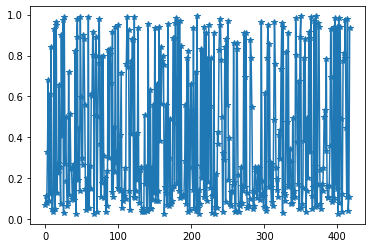

In [84]:
y_pred_df.plot(marker="*")

In [ ]:
!kaggle competitions submit -c titanic -f submission8.csv -m "Test submission" titanic